In [376]:
import matplotlib.pyplot as plt

import numpy as np
import random as rnd

# Чтение данных из файла
with open('var_16_lognorm.csv', 'r') as f:
    data = [float(line.strip()) for line in f.readlines()]


Здесь будет попытка получить те же параметры для обрезанной выборки

In [377]:
# creating class for Data
class Statistics:
    def __init__(self, data: list, name: str):
        self.dataName = name
        self.dataArr = sorted(data)[:250]
        self.dataLen = len(self.dataArr)
        self.getAllParams()
        
    def dataSum(self):
        self.sum = sum(self.dataArr)
        return self.sum
    
    def dataMean(self):
        summ = self.dataSum()
        self.mean = summ / self.dataLen
        return self.mean
    
    def dataMedian(self):
        sortedData = sorted(self.dataArr)
        if self.dataLen % 2 == 0:
            # если количество элементов четное, берем среднее двух средних значений
            mid = self.dataLen // 2
            self.median = (sortedData[mid-1] + sortedData[mid]) / 2
        else:
            # если количество элементов нечетное, берем среднее значение
            self.median = sortedData[self.dataLen//2]
        return self.median
    
    def dataModa(self):
        # Создаем словарь, где ключи - элементы списка, а значения - количество их повторений
        countDict = {}
        for i in self.dataArr:
            if i in countDict:
                countDict[i] += 1
            else:
                countDict[i] = 1
        # Находим элемент(ы) с максимальным количеством повторений
        max_count = max(countDict.values())
        self.modes = []
        for key, value in countDict.items():
            if value == max_count:
                self.modes.append(key)

        # Возвращаем моду(ы)
        return self.modes
    
    def dataRange(self):
        self.range = max(self.dataArr) - min(self.dataArr)
        return self.range
    
    def dataBiasedVariance(self):
        mean = self.dataMean()
        squared_differences_sum = sum([(x - mean) ** 2 for x in self.dataArr])
        self.biasedVariance = squared_differences_sum / (self.dataLen)
        return self.biasedVariance
    
    def dataUnbiasedVariance(self):
        mean = self.dataMean()
        squared_differences_sum = sum([(x - mean) ** 2 for x in self.dataArr])
        self.unbiasedVariance = squared_differences_sum / (self.dataLen - 1)
        return self.unbiasedVariance
    
    def dataStartMoment(self, k):
        moment = sum([x**k for x in self.dataArr])/self.dataLen
        return moment
    
    def dataCenterMoment(self, k):
        mean = self.dataMean()
        moment = sum([(x - mean) ** k for x in self.dataArr])/self.dataLen
        return moment
    
    def getAllParams(self):
        self.dataSum()
        self.dataMean()
        self.dataMedian()
        self.dataModa()
        self.dataRange()
        self.dataBiasedVariance()
        self.dataUnbiasedVariance()

    def printAllParams(self, printStats:bool = False, printGraphics:bool = False):
        self.getAllParams()
        print('='*100)
        print(f"Statistics for data: {self.dataName}")

        if printStats:
            print("Data length is", self.dataLen)
            print("Data mean is", self.mean)
            print("Data median is", self.median)
            print("Data moda is", self.modes)
            print("Data range is", self.range)
            print("Data Biased Variance is", self.biasedVariance)
            print("Data Unbiased Variance is", self.unbiasedVariance)
            print("Data start moment is", self.dataStartMoment(2))
            print("Data center moment is", self.dataCenterMoment(2))

        if printGraphics:
            fig, ax = plt.subplots(figsize=(12, 6))
            ax.hist(self.dataArr, bins=range(int(min(self.dataArr)), int(max(self.dataArr)), 1), density=True)

            # Настройка внешнего вида графика
            ax.set_xlabel('Значение')
            ax.set_ylabel('Плотность вероятности')
            ax.set_title('Распределение')

            # Вывод графика на экран
            plt.show()
        print('='*100)
   
    def histogramm(self, columns:int=20, printMPL:bool = True, printOWN:bool = False, print_OWN_MPL:bool = False):
        data_array = sorted(self.dataArr)
        data_min = min(data_array)
        data_max = max(data_array)
        data_range = data_max-data_min
        data_step = data_range/columns
        data_cpy = data_array.copy()
        if(printOWN):
            data_columns = [[] for i in range(columns)]
            data_tmp = data_min
            for column_number in range(columns):
                elem_to_delete = []
                for i in range(len(data_cpy)):
                    if data_cpy[i] >= data_tmp and data_cpy[i] < data_tmp + data_step:
                        data_columns[column_number].append(data_cpy[i])
                        elem_to_delete.append(data_cpy[i])
                for el in elem_to_delete:
                    data_cpy.remove(el)
                data_tmp += data_step
            
            if(len(data_cpy) > 0):
                for i in range(len(data_cpy)):
                    data_columns[-1].append(data_cpy[i])

            data_columns_probability = [len(i) for i in data_columns]
            
            max_prob = max(data_columns_probability)
            if max_prob == 0:
                return # нет значений, нечего выводить

            column_width = 14
            string_down = "\033[30m\033[47m{:>6}╚".format(0)
            string_down += '═' * column_width * (columns+1) + "► Значение случайной величины "
            str_len = len(string_down)

            str_tmp = "\033[30m\033[47m      " + " "*column_width * (columns//2) +"Гистограмма выборки" 
            print(str_tmp + " " *(str_len-len(str_tmp)))
            str_tmp = " Встретилось "
            print(str_tmp + " " *(str_len-len(str_tmp)-10))
            str_tmp = "раз в выборке"
            print(str_tmp + " " *(str_len-len(str_tmp)-10))
            print("      ▲" + " " * (str_len-17))
            print("      ║" + " " * (str_len-17))
            
            additional_step = 1
            if max_prob > 50:
                additional_step = 5
            if max_prob > 100:
                additional_step = 10
            y_max = (max_prob//additional_step + 1 )*(additional_step)
            for y in range(0, y_max, additional_step):
                
                string = "\033[30m\033[47m{:>6}║".format(y_max - y)
                string += ' ' * (column_width//2)
                for i in range(columns):
                    if(data_columns_probability[i] >= y_max - y):
                        string += '\033[36m\033[47m█' * column_width
                    elif(data_columns_probability[i] >= 1 and (y_max - y) <= additional_step):
                        string += '\033[36m\033[47m▄' * column_width
                    else:
                        string += '\033[36m\033[47m ' * column_width
                string += ' ' * 37
                print(string)
            # string_down = "\033[30m\033[47m{:>6}╚".format(0)
            # string_down += '═' * column_width * (columns+1) + "► Значение случайной величины "
                        
            print(string_down)
            X_axes_str = [data_min + data_step * i for i in range(columns+1)]
            string_down2 = "       "
            for i in X_axes_str:
                string_down2 += "{:^14.2f}".format(i) 
            string_down2 += " "*30
            print(string_down2)

        if printMPL:
            fig, ax = plt.subplots(figsize=(12, 6))
            ax.hist(data_array, bins=columns)

            # Настройка внешнего вида графика
            ax.set_xlabel('Значение')
            ax.set_ylabel('Плотность вероятности')
            ax.set_title('Распределение')

            # Вывод графика на экран
            plt.show()
    
    def L_rightness(self, mu, sigma_square):
        L = np.float64(0);
        for x_i in self.dataArr:
            alpha = 1/((x_i+0.000001)*((sigma_square*2*np.pi)**0.5))
            beta = - (((np.log((x_i+0.000001))-mu)**2)/sigma_square)/(2)
            L += alpha*(np.exp(beta))        
        
        # L = np.float64(- self.dataLen * np.log((2*np.pi*sigma_square))/2);
        # for x in self.dataArr:
        #     L -= (np.log(x) + ((np.log(x)-mu)**2)/(2*sigma_square))
        return np.log(L);
    
    def momentMethod(self):
        mX = self.dataStartMoment(1)
        mX2 = self.dataStartMoment(2)
        mu = 2 * np.log(mX) - 0.5 * np.log(mX2)
        sigma_square = (np.log(mX2) - 2 * np.log(mX))
        print('Оценка методом моментов\nmu =', str(mu), '; sigma^2 = ', str(sigma_square))
        self.mu_momentMethod = mu
        self.sigmaSquare_momentMethod = sigma_square
    
    def maximumRightnessMethod(self):
        mu = sum([np.log(x) for x in self.dataArr])/self.dataLen
        sigma_square = sum([(np.log(x)-mu)**2 for x in self.dataArr])/len(self.dataArr)
        print('Оценка методом максимального правдоподобия\nmu =', str(mu), '; sigma^2 = ', str(sigma_square))
        self.mu_maximumRightnessMethod = mu
        self.sigmaSquare_maximumRightnessMethod = sigma_square

        

classedOldData = Statistics(data, 'Read data')
classedOldData.printAllParams(printStats= True)

data_unbias = [data[i] - min(data) + 0.01 for i in range(len(data))]
classedUnbiasedData = Statistics(data_unbias, 'Unbiased Read data')
classedUnbiasedData.printAllParams(printStats= True)


Statistics for data: Read data
Data length is 250
Data mean is 20.116140783999995
Data median is 9.0841005
Data moda is [8.98]
Data range is 189.61139300000002
Data Biased Variance is 943.915409473593
Data Unbiased Variance is 947.7062344112379
Data start moment is 1348.574529515301
Data center moment is 943.915409473593
Statistics for data: Unbiased Read data
Data length is 250
Data mean is 11.146140784000002
Data median is 0.11410049999999948
Data moda is [0.01]
Data range is 189.61139300000002
Data Biased Variance is 943.9154094735928
Data Unbiased Variance is 947.7062344112378
Data start moment is 1068.1518638503412
Data center moment is 943.9154094735928


$$Выборочная \space(эмпири́ческая)\space фу́нкция\space распределе́ния\space в\space математической\space статистике\space —\\\space это\space приближение\space теоретической\space функции\space распределения,\space построенное \space с помощью\space выборки\space из\space него.$$
$$ Пусть\space X_{1},\ldots ,X_{n}\space — \spaceвыборка\space объёма\space n ,\space порождённая \spaceслучайной\space величиной \space X, \space задаваемой \space функцией \space распределения \space F(x) $$
$$ Будем\space считать, \space что \space X_{i},\space где\space i \in \{1, n\}, \space n\in \N \space— \spaceнезависимые\space случайные \spaceвеличины,\\
определенные \space на\space некотором\space пространстве \space элементарных \space исходов \space \omega $$
$$ Пусть \space x \in \R. \space Определим \space функцию \space \hat{F}(x) \space следующим\space образом: $$ 
$$ \hat{F}(x) = \frac{1}{n}\sum_{i=1}^{n}\theta (x-X_{i}), \space где $$
$$ \theta (x)={\begin{cases}0,&x<0;\\1,&x\geqslant 0.\end{cases}}\space  —\space  Функция \space Хевисайда  $$


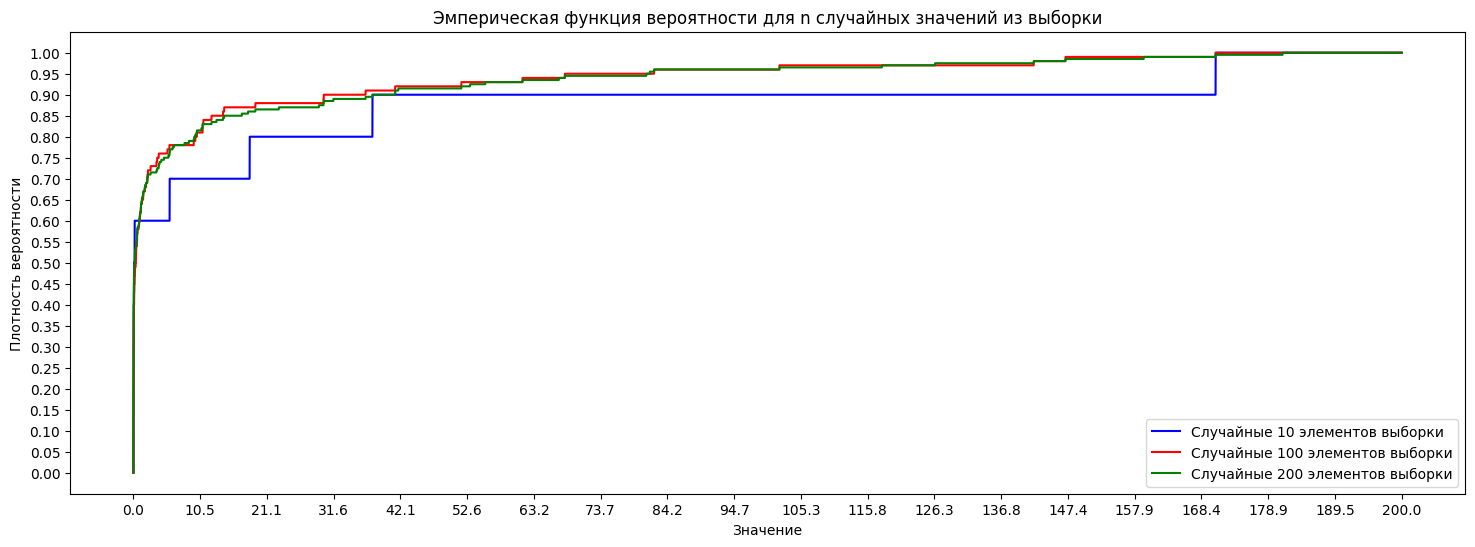

In [378]:
# плотность вероятности

rnd.seed(0)

def Heviside(x):
    if(x<0):
        return 0
    return 1

def f_hat(x, dataSet: Statistics):
    s = 0
    for xi in sorted(dataSet.dataArr):
        s += Heviside(x-xi)
    return s/dataSet.dataLen

def getRandomArr(dataSet: Statistics, len):
    result= rnd.sample(dataSet.dataArr, len)
    return result

dataRand_10 = getRandomArr(classedUnbiasedData, 10)
classedRandData_10 = Statistics(dataRand_10, 'Случайные 10 элементов выборки')
dataRand_100 = getRandomArr(classedUnbiasedData, 100)
classedRandData_100 = Statistics(dataRand_100, 'Случайные 100 элементов выборки')
dataRand_200 = getRandomArr(classedUnbiasedData, 200)
classedRandData_200 = Statistics(dataRand_200, 'Случайные 200 элементов выборки')

right_border = 200 # поставить 20к или 200к для дальнего вида
left_border = 0
X = np.linspace(0.001 + left_border,right_border, num=10000)
# step = 100
# X = [a/step for a in range(0, 100*step)]
Y_10 = [f_hat(a, classedRandData_10) for a in X]
Y_100 = [f_hat(a, classedRandData_100) for a in X]
Y_200 = [f_hat(a, classedRandData_200) for a in X]

fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(X, Y_10, color='blue', label=f'{classedRandData_10.dataName}')
ax.plot(X, Y_100, color='red', label=f'{classedRandData_100.dataName}')
ax.plot(X, Y_200, color='green', label=f'{classedRandData_200.dataName}')

xt = np.linspace(left_border, right_border, num=20)
yt = [a/100 for a in range(0, 101, 5)]
ax.set_xticks(xt)
ax.set_yticks(yt)
# Настройка внешнего вида графика
ax.set_xlabel('Значение')
ax.set_ylabel('Плотность вероятности')
ax.set_title('Эмперическая функция вероятности для n случайных значений из выборки')
ax.legend()

# Вывод графика на экран
plt.show()

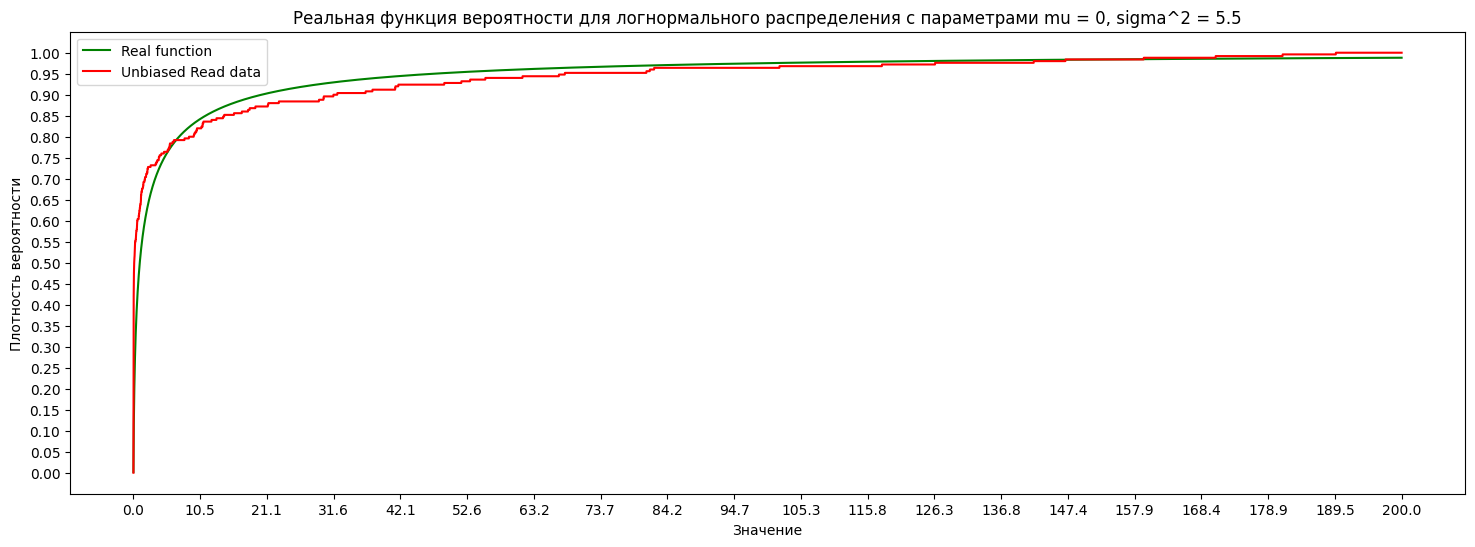

In [379]:
# теоретическая функция вероятности
import scipy as scp

def F_real(x, mu, sigma_square, bias = 0):
    res = 1/2 + (scp.special.erf((np.log(x+0.000001-bias)-mu)/((sigma_square**0.5)*(2**0.5))))/2
    return res

mu = -0
sigma_square = 5.5
Y_real = [F_real(x, mu, sigma_square) for x in X]
Y_read = [f_hat(a, classedUnbiasedData) for a in X]

fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(X, Y_real, color='green', label=f'Real function')
ax.plot(X, Y_read, color='red', label=f'{classedUnbiasedData.dataName}')

# Настройка внешнего вида графика
ax.set_xlabel('Значение')
ax.set_ylabel('Плотность вероятности')
ax.set_title(f'Реальная функция вероятности для логнормального распределения с параметрами mu = {mu}, sigma^2 = {sigma_square}')
ax.set_xticks(xt)
ax.set_yticks(yt)
ax.legend()

# Вывод графика на экран
plt.show()

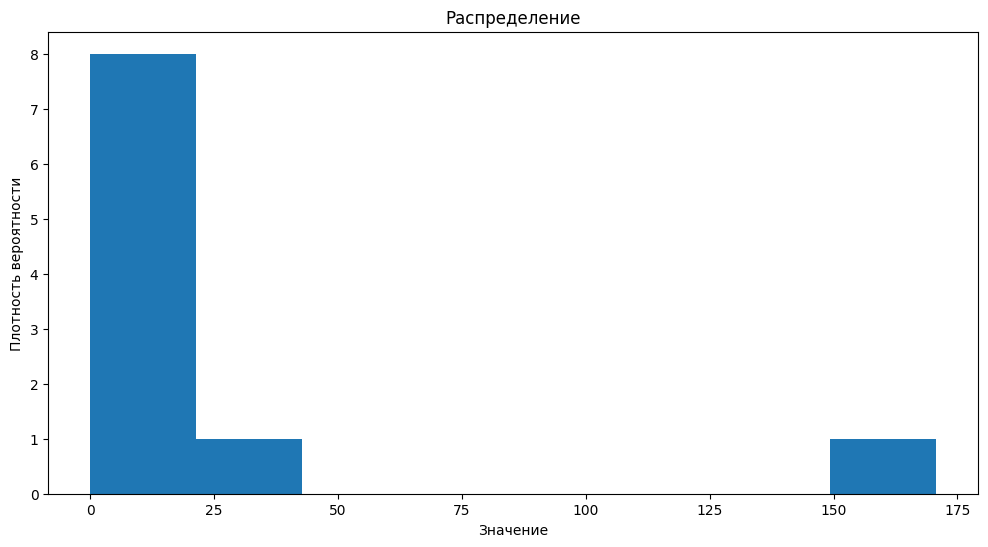

8


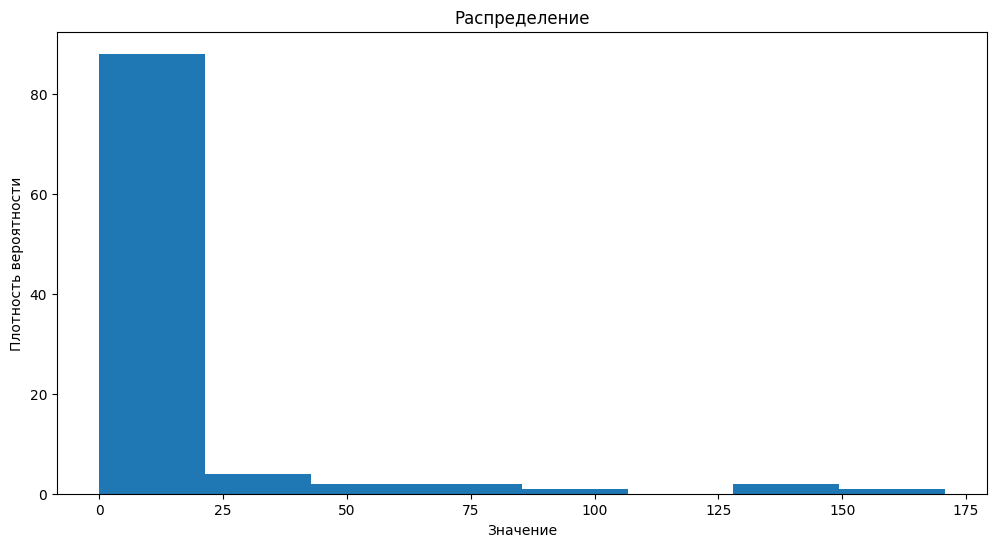

8


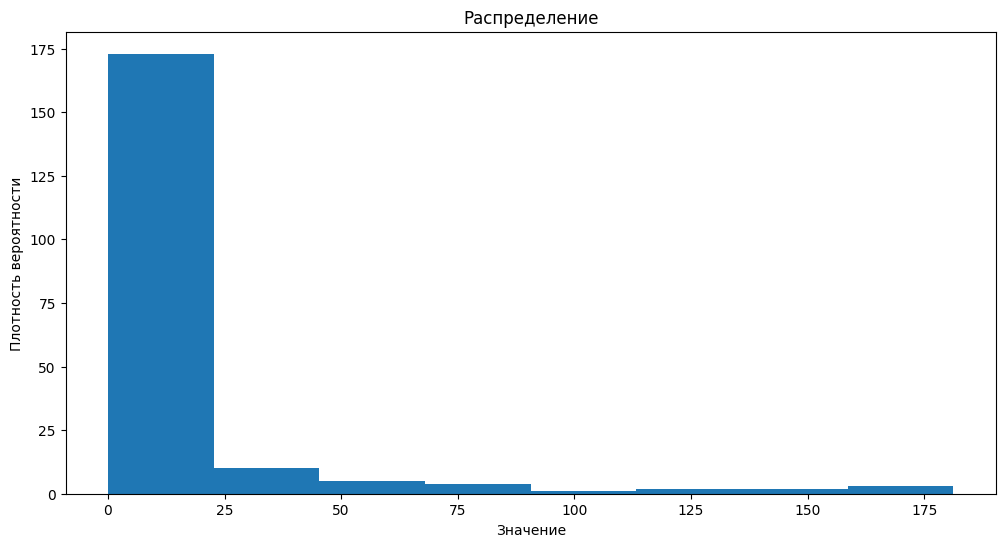

8


In [380]:
  
somedata = [rnd.randint(0, 100) for i in range (100)]
classedReallyRandomData = Statistics(somedata, name="Really random data")
# classedReallyRandomData.histogramm(columns=10)

# classedRandData_10.histogramm(columns=10);
# classedRandData_100.histogramm(columns=10);
# classedRandData_200.histogramm(columns=10);
classedRandData_10.histogramm(columns=(1 + int(np.log2(classedRandData_10.range))),printMPL=True);
print((1 + int(np.log2(classedRandData_10.range))))
classedRandData_100.histogramm(columns=(1 + int(np.log2(classedRandData_100.range))),printMPL=True);
print((1 + int(np.log2(classedRandData_100.range))))
classedRandData_200.histogramm(columns=(1 + int(np.log2(classedRandData_200.range))),printMPL=True);
print((1 + int(np.log2(classedRandData_200.range))))

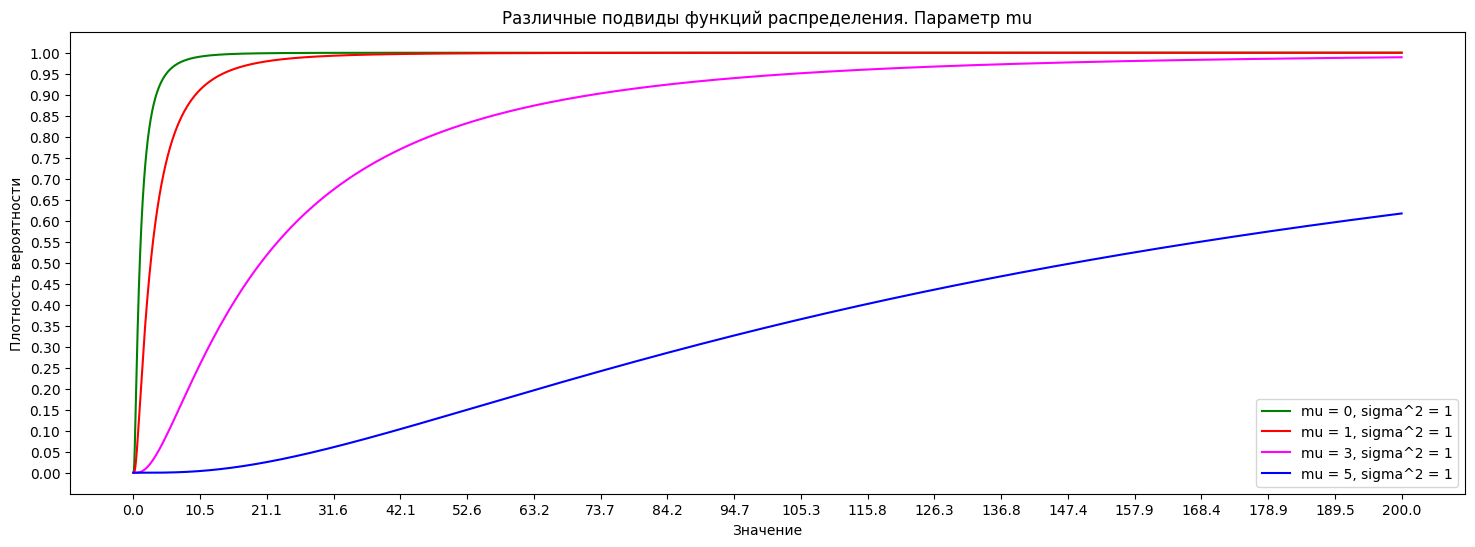

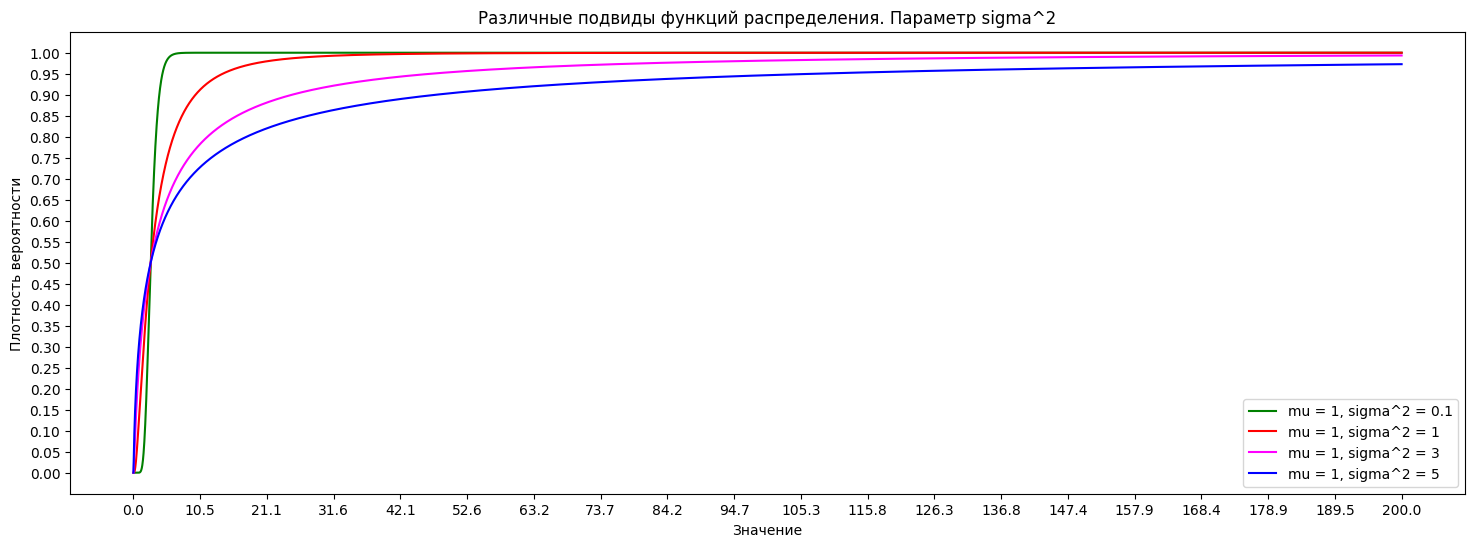

In [381]:
mu = 0
sigma_square = 1
Y_real_0 = [F_real(x, 0, sigma_square) for x in X]
Y_real_1 = [F_real(x, 1, sigma_square) for x in X]
Y_real_3 = [F_real(x, 3, sigma_square) for x in X]
Y_real_5 = [F_real(x, 5, sigma_square) for x in X]

fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(X, Y_real_0, color='green', label=f'mu = 0, sigma^2 = 1')
ax.plot(X, Y_real_1, color='red', label=f'mu = 1, sigma^2 = 1')
ax.plot(X, Y_real_3, color='magenta', label=f'mu = 3, sigma^2 = 1')
ax.plot(X, Y_real_5, color='blue', label=f'mu = 5, sigma^2 = 1')
# ax.plot(X_biased, Y_real_biased, color='blue', label=f'Real biassed function')
# Настройка внешнего вида графика
ax.set_xlabel('Значение')
ax.set_ylabel('Плотность вероятности')
ax.set_title(f'Различные подвиды функций распределения. Параметр mu')
ax.set_xticks(xt)
ax.set_yticks(yt)
ax.legend()

# Вывод графика на экран
plt.show()

mu = 1
Y_real_0 = [F_real(x, 1, 0.1) for x in X]
Y_real_1 = [F_real(x, 1, 1) for x in X]
Y_real_3 = [F_real(x, 1, 3) for x in X]
Y_real_5 = [F_real(x, 1, 5) for x in X]

fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(X, Y_real_0, color='green', label=f'mu = 1, sigma^2 = 0.1')
ax.plot(X, Y_real_1, color='red', label=f'mu = 1, sigma^2 = 1')
ax.plot(X, Y_real_3, color='magenta', label=f'mu = 1, sigma^2 = 3')
ax.plot(X, Y_real_5, color='blue', label=f'mu = 1, sigma^2 = 5')
# ax.plot(X_biased, Y_real_biased, color='blue', label=f'Real biassed function')
# Настройка внешнего вида графика
ax.set_xlabel('Значение')
ax.set_ylabel('Плотность вероятности')
ax.set_title(f'Различные подвиды функций распределения. Параметр sigma^2')
ax.set_xticks(xt)
ax.set_yticks(yt)
ax.legend()

# Вывод графика на экран
plt.show()

6. Понятие точечных оценок.  
    1. Оценить параметры распределения выборки методом моментов.   
    2. Оценить параметры распределения выборки методом максимального правдоподобия.  
    3. Привести и обосновать свойства полученных оценок: несмещенность, состоятельность, эффективность, R-эффективность.   
    4. На одном графике построить:  
        1.   теоретическую функцию распределения с оценками параметров распределения, найденными методом моментов;  
        2.   теоретическую функцию распределения с оценками параметров распределения, найденными методом максимального правдоподобия;  
        3.   эмпирическую функцию распределения (по всей выборке). Построенный график должен содержать наименование, подпись осей, легенду.  
    5. Занести соответствующие вычисления и график в отчет.  
    6. Сделать вывод о значении оценок параметров распределения и схожести эмпирической и теоретических функций распределения.  

\begin{cases}
   e^{\mu + \frac{\sigma^{2}}{2}}=\frac{1}{N}\sum_{i=1}^{N}X_{i} &\text{Первый теоретический начальный момент равен первому выборочному начальному моменту } \\
   e^{2\mu + 2\sigma^{2}}=\frac{1}{N}\sum_{i=1}^{N}X_{i}^{2} &\text{Второй теоретический начальный момент равен второму выборочному начальному моменту }
\end{cases}
$$ \text{Обозначим}  $$

\begin{cases}
   m_{1}=\frac{1}{N}\sum_{i=1}^{N}X_{i} &\text{Первый выборочный начальный момент } \\
   m_{2}=\frac{1}{N}\sum_{i=1}^{N}X_{i}^{2} &\text{Второй выборочный начальный момент }
\end{cases}
$$ \text{Тогда}  $$

\begin{cases}
   m_{1}=e^{\mu + \frac{\sigma^{2}}{2}} \\
   m_{2}=e^{2\mu + 2\sigma^{2}} \\
   m_{1}^{2}=e^{2\mu + \sigma^{2}} \\
   m_{1}^{4}=e^{4\mu + 2\sigma^{2}}
\end{cases}

\begin{cases}
   \frac{m_{2}}{m_{1}^{2}}=e^{\sigma^{2}} \\ \\
   \frac{m_{1}^{4}}{m_{2}}=e^{2\mu}
\end{cases}

\begin{cases}
   \sigma = \pm\sqrt{ln(m_{2})-2ln(m_{1})} \\
   \mu=2ln(m_{1})-0.5ln(m_{2})
\end{cases}

Оценка методом моментов
mu = 1.3353440379191719 ; sigma^2 =  2.151498564094762


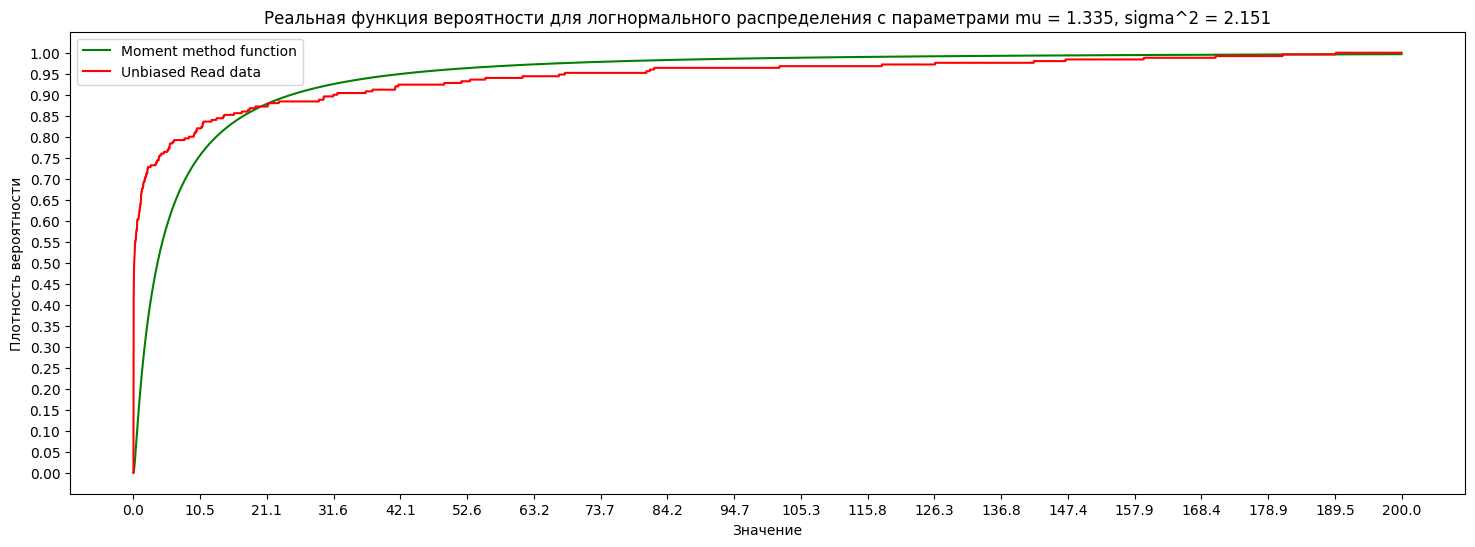

In [382]:
# метод моментов

classedUnbiasedData.momentMethod()

Y_real = [F_real(x, classedUnbiasedData.mu_momentMethod, classedUnbiasedData.sigmaSquare_momentMethod) for x in X]
Y_read = [f_hat(a, classedUnbiasedData) for a in X]

our_data = classedUnbiasedData

fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(X, Y_real, color='green', label=f'Moment method function')
ax.plot(X, Y_read, color='red', label=f'{classedUnbiasedData.dataName}')
# Настройка внешнего вида графика
ax.set_xlabel('Значение')
ax.set_ylabel('Плотность вероятности')
ax.set_title(f'Реальная функция вероятности для логнормального распределения с параметрами mu = {classedUnbiasedData.mu_momentMethod:0.3f}, sigma^2 = {classedUnbiasedData.sigmaSquare_momentMethod:0.3f}')
ax.set_xticks(xt)
ax.set_yticks(yt)
ax.legend()

# Вывод графика на экран
plt.show()



E(X) = 1.2840254166877414
Median = 1.0
Moda = 0.6065306597126334
D(X) = 1.0695605577589171


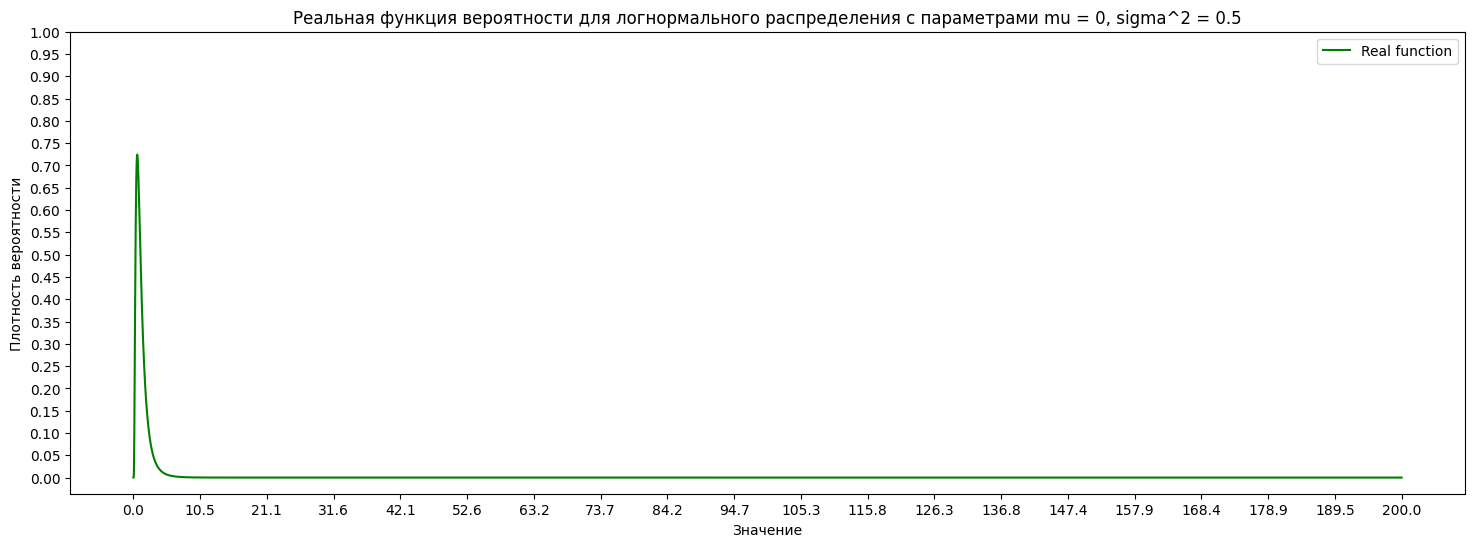

In [383]:
Y_real = []

def func_probability_density(x, mu, sigma_square):
    a = np.exp(-(((np.log(x)-mu)**2)/sigma_square)/2)
    b = x * np.sqrt(sigma_square * np.pi * 2)
    return a/b

mu = 0
sigma_square = 1/2#np.sqrt(2)
Y_hist = []
for x in range(1, 100*right_border):
    for kolvo in range(int(100*func_probability_density(x/100, mu, sigma_square))):
        Y_real.append(x/100)
for x in range(1, 100*right_border):
    Y_hist.append((func_probability_density(x/100, mu, sigma_square)))

print('E(X) =', str(np.exp(mu+sigma_square/2)))
print('Median =', str(np.exp(mu)))
print('Moda =', str(np.exp(mu-sigma_square)))
print('D(X) =', str(np.exp(2*mu+sigma_square)*(np.exp(sigma_square)-1)))

fig, ax = plt.subplots(figsize=(18, 6))
ax.plot([x/100 for x in range(1, 100*right_border)], Y_hist, color='green', label=f'Real function')
ax.set_xlabel('Значение')
ax.set_ylabel('Плотность вероятности')
ax.set_title(f'Реальная функция вероятности для логнормального распределения с параметрами mu = {mu}, sigma^2 = {sigma_square}')
# xt = np.linspace(0, 10, num=40)
ax.set_xticks(xt)
ax.set_yticks(yt)
ax.legend()

# Вывод графика на экран
plt.show()


Оценка методом моментов
mu = 1.3353440379191719 ; sigma^2 =  2.151498564094762
Оценка методом максимального правдоподобия
mu = -1.2805172532121836 ; sigma^2 =  9.790090728888245


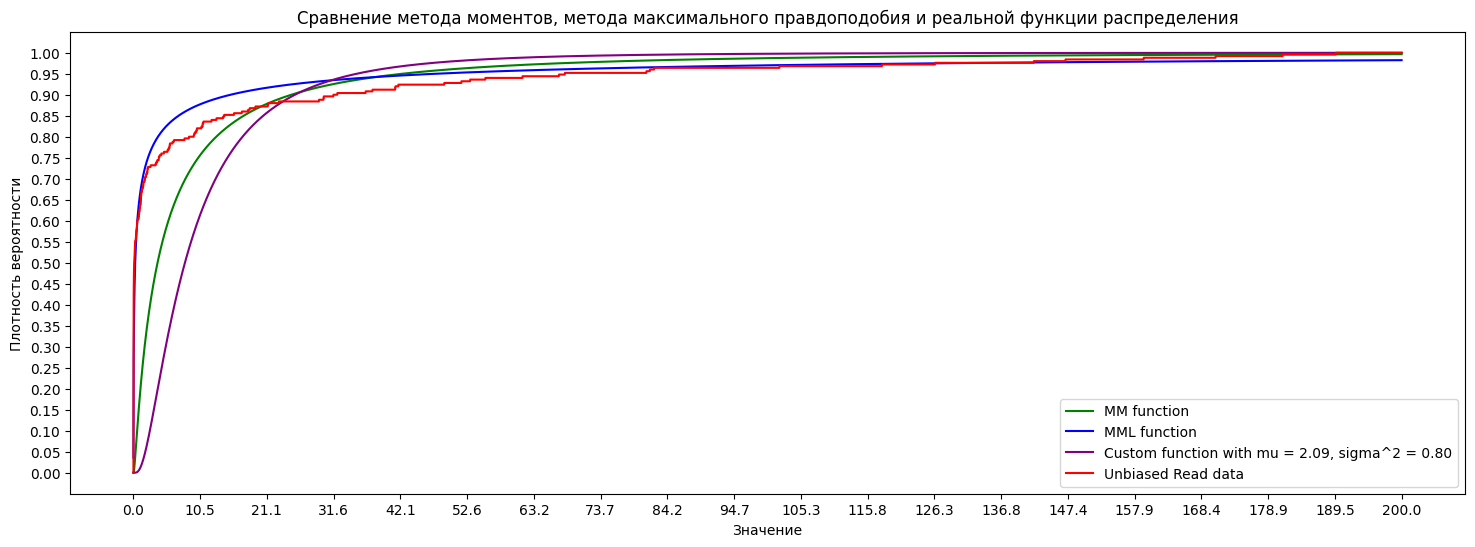

In [394]:
classedUnbiasedData.momentMethod()
classedUnbiasedData.maximumRightnessMethod()

custom_mu = 2.0944769386273117
custom_sigma_square = 0.7957592366278147

Y_real = [F_real(x, classedUnbiasedData.mu_momentMethod, classedUnbiasedData.sigmaSquare_momentMethod) for x in X]
Y_real2 = [F_real(x, classedUnbiasedData.mu_maximumRightnessMethod, classedUnbiasedData.sigmaSquare_maximumRightnessMethod) for x in X]
Y_real3 = [F_real(x, custom_mu, custom_sigma_square) for x in X]
Y_read = [f_hat(a, our_data) for a in X]

fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(X, Y_real, color='green', label=f'MM function')
ax.plot(X, Y_real2, color='blue', label=f'MML function')
ax.plot(X, Y_real3, color='purple', label=f'Custom function with mu = {custom_mu:0.2f}, sigma^2 = {custom_sigma_square:0.2f}')
ax.plot(X, Y_read, color='red', label=f'{our_data.dataName}')
# Настройка внешнего вида графика
ax.set_xlabel('Значение')
ax.set_ylabel('Плотность вероятности')
ax.set_title(f'Сравнение метода моментов, метода максимального правдоподобия и реальной функции распределения')
ax.set_xticks(xt)
ax.set_yticks(yt)
ax.legend()

# Вывод графика на экран
plt.show()

7. Понятие интервальных оценок. 
    1. Оценить  параметры  распределения  выборки  с  помощью  интервальной  оценки  с уровнями доверия 𝛾1=0,95, 𝛾2=0,99  
    2. Занести соответствующие вычисления в отчет. 
    3. Сделать вывод о близости значений интервальных и точечных оценок

In [392]:

SE = (our_data.dataUnbiasedVariance() / our_data.dataLen)**0.5
Z_95 = 1.960
Z_99 = 2.576
ME_95 = Z_95*SE
ME_99 = Z_99*SE
x_ = np.log(our_data.dataStartMoment(1)/np.sqrt(1+(our_data.dataCenterMoment(2))/(our_data.dataStartMoment(2))))#sum([np.log(x) for x in our_data.dataArr])/our_data.dataLen #our_data.dataMean()
our_data.printAllParams(True)
print("Mu 95%: (" + str(x_-ME_95) + "," + str(x_+ME_95)+")") 
print("Mu 99%: (" + str(x_-ME_99) + "," + str(x_+ME_99)+")") 
Q1_95 = (((our_data.dataLen-1)*(our_data.dataBiasedVariance())**0.5/(294.6)))**0.5
Q2_95 = (((our_data.dataLen-1)*(our_data.dataBiasedVariance())**0.5/(207.18)))**0.5

Q1_99 = (((our_data.dataLen-1)*(our_data.dataBiasedVariance())**0.5/(303.83)))**0.5
Q2_99 = (((our_data.dataLen-1)*(our_data.dataBiasedVariance())**0.5/(200)))**0.5
o_ = np.sqrt(np.log(1+(our_data.dataCenterMoment(2))/(our_data.dataStartMoment(2))))#our_data.dataBiasedVariance()
print("sigma 95%: (" + str(o_-Q1_95) + "," + str(o_+Q2_95)+")") 
print("sigma 99%: (" + str(o_-Q1_99) + "," + str(o_+Q2_99)+")") 
print(x_, o_)

Y_real_ME = [F_real(x, 1.1036129651392073, 0.4808162191169823) for x in X]

Statistics for data: Unbiased Read data
Data length is 250
Data mean is 11.146140784000002
Data median is 0.11410049999999948
Data moda is [0.01]
Data range is 189.61139300000002
Data Biased Variance is 943.9154094735928
Data Unbiased Variance is 947.7062344112378
Data start moment is 1068.1518638503412
Data center moment is 943.9154094735928
Mu 95%: (-1.721651083394073,5.910604960648696)
Mu 99%: (-2.921005604600794,7.109959481855418)
sigma 95%: (-4.300090007213255,6.872336554318185)
sigma 99%: (-4.222090082304996,6.9804493603933215)
2.0944769386273117 0.7957592366278147


8. Понятие статистических критериев.

    8.1 Гипотезы о параметрах распределениях.

        8.1.1 Построить наиболее мощный критерий для проверки нулевой гипотезы вида H0:{a=} для каждого параметра распределения a. Здесь - оценка параметра распределения a, полученная в результате применения метода моментов (i=1), метода максимального правдоподобия (i=2).
        В качестве уровня значимости принять α1=0,05. 

        8.1.2 Вычислить ошибки 1-го и 2-го рода.

        8.1.3 Занести соответствующие вычисления в отчет.

        8.1.4 Сделать вывод о результате работы критерия.

    8.2 Гипотезы о виде распределения.

        8.2.1 Используя критерий Колмогорова и критерий χ2, проверить гипотезу о принадлежности выборки распределению из варианта. 
        Примечание: в качестве уровня значимости принять α1=0,05.

        8.2.2 Занести соответствующие вычисления в отчет.

        8.2.3 Сделать вывод о результате работы критериев.

    8.3 Гипотезы об однородности выборок.

        8.3.1 Провести поиск распределений, близких по виду к распределению из варианта. Утвердить вид найденного распределения G(x) у преподавателя.

        8.3.2 Методом обратного преобразования сгенерировать выборку X2 из распределения G(x).

        8.3.3 Построить критерий для проверки гипотезы вида: H0{F1(x), F2(x)~F(x, θ)} против альтернативы H1:{F1(x)~F(x, θ), F2(x)~G(x,θ)}. Вид критерия утвердить у преподавателя.
        Примечание: в качестве уровня значимости принять α1=0,05.

        8.3.4 Оценить мощность критерия.

        8.3.5 Занести соответствующие вычисления в отчет.

        8.3.6 Сделать вывод о результате работы выбранного критерия.



In [386]:
our_data = classedUnbiasedData
# our_data.printAllParams(printStats=True);
# 0, 5.5
L_0 = our_data.L_rightness(custom_mu, custom_sigma_square);
L_1 = our_data.L_rightness(our_data.mu_momentMethod, our_data.sigmaSquare_momentMethod) # MM
L_2 = our_data.L_rightness(our_data.mu_maximumRightnessMethod, our_data.sigmaSquare_maximumRightnessMethod) # mmp

print("Stock likelihood: ", L_0, L_1, L_2)
# print("Ln likelihood   : ",np.log(L_0), np.log(L_1), np.log(L_2))
# LRT_1 = -2*(np.log(L_0)-np.log(L_1))
# LRT_2 = -2*(np.log(L_0)-np.log(L_2))
# LRT_3 = -2*(np.log(L_1)-np.log(L_2))
LRT_1 = -2*((L_0)-(L_1))
LRT_2 = -2*((L_0)-(L_2))
LRT_3 = -2*((L_1)-(L_2))
print(LRT_1, LRT_2, LRT_3, 5.99)

Stock likelihood:  6.106624772630794 2.6804502136255923 6.522017751448813
-6.8523491180104035 0.8307859576360386 7.683135075646442 5.99


In [387]:
Y_0_5d5 = [F_real(x, 0.0001, 5.5) for x in X]
Y_read = [f_hat(a, our_data) for a in X]
Razn = [float(np.abs(Y_0_5d5[x]-Y_read[x])) for x in range(len(X))]
lambd = np.max(Razn)*(our_data.dataLen/2)**0.5
print(lambd, np.max(Razn), 1.36)
# Выборка правильная

3.79555787804157 0.33948501711343226 1.36


In [388]:
def F_real_norm(x, mu, sco, bias = 0):
    res = 1/2 + (scp.special.erf(((x-bias)-mu)/(sco*(2**0.5))))/2
    return res
Y_0_5d5 = [F_real(x, 0.0001, 5.5) for x in X]
Y_0_5d5_norm = [F_real_norm(x, 0.0001, 5.5) for x in X]
Y_read = [f_hat(a, our_data) for a in X]
Razn = [float(np.abs(Y_0_5d5[x]-Y_read[x])) for x in range(len(X))]
Razn_norm = [float(np.abs(Y_0_5d5_norm[x]-Y_read[x])) for x in range(len(X))]
lambd = np.max(Razn)*(our_data.dataLen/2)**0.5
lambd_norm = np.max(Razn_norm)*(our_data.dataLen/2)**0.5
print(lambd, np.max(Razn), lambd_norm, np.max(Razn_norm))

3.79555787804157 0.33948501711343226 5.590899812702825 0.5000652814637744
